In [231]:
from pathlib import Path

In [232]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from matplotlib.ticker import MaxNLocator


<br>
README FIRST<br>
The below code is a template for the solution. You can change the code according<br>
to your preferences, but the test_model function has to save the output of your <br>
model on the test data as it does in this template. This output must be submitted.<br>
Replace the dummy code with your own code in the TODO sections.<br>
We also encourage you to use tensorboard or wandb to log the training process<br>
and the performance of your model. This will help you to debug your model and<br>
to understand how it is performing. But the template does not include this<br>
functionality.<br>
Link for wandb:<br>
https://docs.wandb.ai/quickstart/<br>
Link for tensorboard: <br>
https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html<br>


The device is automatically set to GPU if available, otherwise CPU<br>
If you want to force the device to CPU, you can change the line to<br>
device = torch.device("cpu")

If you have a Mac consult the following link:<br>
https://pytorch.org/docs/stable/notes/mps.html

It is important that your model and all data are on the same device.

In [233]:
# MPS on Mac as device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS backend")
else:
    device = torch.device("cpu")
    print("Using CPU backend")

Using MPS backend


In [234]:
def get_data():
    """
    Get the training and test data. The data files are assumed to be in the
    same directory as this script.
    Args:
    - kwargs: Additional arguments that you might find useful - not necessary
    Returns:
    - train_data_input: Tensor[N_train_samples, C, H, W]
    - train_data_label: Tensor[N_train_samples, C, H, W]
    - test_data_input: Tensor[N_test_samples, C, H, W]
    where N_train_samples is the number of training samplees, N_test_samples is
    the number of test samples, C is the number of channels (1 for grayscale),
    H is the height of the image, and W is the width of the image.
    """
    # Load the training data
    train_data = np.load("train_data.npz")["data"] # extracts the "data" arrray (i.e. images from the file)

    # Make the training data a tensor
    train_data = train_data / 255 ##normalization
    train_data = torch.tensor(train_data, dtype=torch.float32) # Converts the NumPy array to a PyTorch tensor of type float32, required for model training.

    # Load the test data
    test_data_input = np.load("test_data.npz")["data"]

    # Make the test data a tensor
    test_data_input = test_data_input / 255 ##normalization
    test_data_input = torch.tensor(test_data_input, dtype=torch.float32)

    ########################################
    # TODO: Given the original training images, create the input images and the
    # label images to train your model. 
    # Replace the two placholder lines below (which currently just copy the
    # training data) with your own implementation.

    train_data_label = train_data.clone() #A copy/clone of the full, original training images — this is what the model will try to predict.
    train_data_input = train_data.clone()
    
    train_data_input[:, 0, 10:18, 10:18] = 0.0 # application of central masking in all objects of the array/tensor

    # Visualize the training data if needed
    # Set to False if you don't want to save the images
    if True:
        # Create the output directory if it doesn't exist
        if not Path("train_image_output").exists():
            Path("train_image_output").mkdir()
        for i in tqdm(range(20), desc="Plotting train images"): # save the first 20 input/label image pairs for visual inspection 
            # Show the training and the target image side by side
            plt.subplot(1, 2, 1)
            plt.imshow(train_data_input[i].squeeze(), cmap="gray")
            plt.title("Training Input")
            plt.subplot(1, 2, 2)
            plt.title("Training Label")
            plt.imshow(train_data_label[i].squeeze(), cmap="gray")
            plt.savefig(f"train_image_output/image_{i}.png")
            plt.close()
    return train_data_input, train_data_label, test_data_input

In [235]:
def train_model(train_data_input, train_data_label):
    
    """
    Train the model. Fill in the details of the data loader, the loss function,
    the optimizer, and the training loop.
    Args:
    - train_data_input: Tensor[N_train_samples, C, H, W]
    - train_data_label: Tensor[N_train_samples, C, H, W]
    - kwargs: Additional arguments that you might find useful - not necessary
    Returns:
    - model: torch.nn.Module
    """
    model = Model()
    model.train()
    model.to(device)

    # TODO: Dummy criterion - change this to the correct loss function
    # https://pytorch.org/docs/stable/nn.html#loss-functions
    criterion = nn.MSELoss()

    # TODO: Dummy optimizer - change this to a more suitable optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    # TODO: Correctly setup the dataloader - the below is just a placeholder
    # Also consider that you might not want to use the entire dataset for training alone
    # (batch_size needs to be changed)
    batch_size = 64
    dataset = TensorDataset(train_data_input, train_data_label)
    
    ## Define split sizes
    val_ratio = 0.1  # 10% for validation
    val_size = int(len(dataset) * val_ratio)
    train_size = len(dataset) - val_size
    
    
    ## Randomly split the dataset
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    
    
    #Consider the shuffle parameter and other parameters of the DataLoader class (see https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    ## Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    # Training loop
    # TODO: Modify the training loop in case you need to

    # TODO: The value of n_epochs is just a placeholder and likely needs to be changed
    n_epochs = 20
    
    train_losses = []
    val_losses = []
    
    for epoch in range(n_epochs):
        for x, y in tqdm(
            train_loader, desc=f"Training Epoch {epoch}", leave=False):
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output[:, :, 10:18, 10:18], y[:, :, 10:18, 10:18])
            loss.backward()
            optimizer.step()
            
        train_losses.append(loss.item()) #Append train losses to plot them
            
        print(f"Epoch {epoch} Training loss: {loss.item()}")   
        
        ##Validation
        
        model.eval() # puts model in evaluation mode, disables layers like droput or batch normalization updates
        with torch.no_grad(): # Disables gradient tracking to recude memory use
            for x_val, y_val in val_loader: 
                x_val, y_val = x_val.to(device), y_val.to(device) #applies mode to validation inputs x_val
                val_output = model(x_val) #computes loss between predicted and actual labels
                val_loss = criterion(val_output[:, :, 10:18, 10:18], y_val[:, :, 10:18, 10:18])#calculates loss of batch to a running model
                
        val_losses.append(val_loss.item()) #Append batch loss to plot them        
        
        print(f"Epoch {epoch} Validation Loss: {val_loss.item()}")
        
        
    # After training/validation, plot the batch loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Training Loss", color='b', alpha=0.7)
    plt.plot(val_losses, label="Validation Loss", color='orange', alpha=0.7)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training and Validation Losses")
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()
    
    return model

TODO: define a model. Here, a basic MLP model is defined. You can completely<br>
change this model - and are encouraged to do so.

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        # Encoder
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)      # 28x28 -> 28x28
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)     # 28x28 -> 28x28
        self.pool = nn.MaxPool2d(2)                      # 28x28 -> 14x14
        
        # Decoder
        self.deconv1 = nn.ConvTranspose2d(32, 16, 2, stride=2)  # 14x14 -> 28x28
        self.deconv2 = nn.Conv2d(16, 1, 3, padding=1)           # 28x28 -> 28x28

        # Fully connected layers
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 28*28)

    def forward(self, x):
        # Encoder
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Decoder
        x = F.relu(self.deconv1(x))
        x = self.deconv2(x)

        # Fully connected layers
        x = x.view(x.size(0), -1)      # Flatten to vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 1, 28, 28)      # Reshape to image
        return x

#6k model: 3979 with validation
#this model without validation: 3936


In [237]:
def test_model(model, test_data_input):
    """
    Uses your model to predict the ouputs for the test data. Saves the outputs
    as a binary file. This file needs to be submitted. This function does not
    need to be modified except for setting the batch_size value. If you choose
    to modify it otherwise, please ensure that the generating and saving of the
    output data is not modified.
    Args:
    - model: torch.nn.Module
    - test_data_input: Tensor
    """
    model.eval()       #sets the model to evaluation mode
    model.to(device)   #moves model to appropriate device
    with torch.no_grad(): #disables gradient tracking to save memroy and speed up
        test_data_input = test_data_input.to(device) #sends test input to device
        # Predict the output batch-wise to avoid memory issues
        test_data_output = [] #initializes test data output array
        # TODO: You can increase or decrease this batch size depending on your
        # memory requirements of your computer / model
        # This will not affect the performance of the model and your score
        batch_size = 128
        for i in tqdm(range(0, test_data_input.shape[0], batch_size),desc="Predicting test output",): 
            #iterates through test batches to prevent memroy overload
            #creates a sequence of starting indices for each batch.
            #tqdm(...) wraps the loop to show a progress bar
            output = model(test_data_input[i : i + batch_size]) #This selects a batch of input images: test_data_input[i : i + batch size]. Passes the batch through the trained model to get the predicted outputs
            test_data_output.append(output.cpu()) #Appends the model's predictions to the list test_data_output., moves the tensor from GPU to CPU
        test_data_output = torch.cat(test_data_output) #his concatenates all the batch tensors in test_data_output into a single tensor.

    # Ensure the output has the correct shape
    assert test_data_output.shape == test_data_input.shape, (
        f"Expected shape {test_data_input.shape}, but got "
        f"{test_data_output.shape}."
        "Please ensure the output has the correct shape."
        "Without the correct shape, the submission cannot be evaluated and "
        "will hence not be valid."
    )

    # Save the output
    test_data_output = test_data_output.numpy()
    # Ensure all values are in the range [0, 255]
    save_data_clipped = np.clip(test_data_output, 0, 1) 
    # Convert to uint8
    save_data_uint8 = (save_data_clipped * 255).astype(np.uint8) 
    # Loss is only computed on the masked area - so set the rest to 0 to save space
    save_data = np.zeros_like(save_data_uint8)
    save_data[:, :, 10:18, 10:18] = save_data_uint8[:, :, 10:18, 10:18]
    np.savez_compressed(
        "submit_this_test_data_output.npz", data=save_data)

    # You can plot the output if you want
    # Set to False if you don't want to save the images
    if True:
        # Create the output directory if it doesn't exist
        if not Path("test_image_output").exists():
            Path("test_image_output").mkdir()
        for i in tqdm(range(20), desc="Plotting test images"):
            # Show the training and the target image side by side
            plt.subplot(1, 2, 1)
            plt.title("Test Input")
            plt.imshow(test_data_input[i].squeeze().cpu().numpy(), cmap="gray")
            plt.subplot(1, 2, 2)
            plt.imshow(test_data_output[i].squeeze(), cmap="gray")
            plt.title("Test Output")
            plt.savefig(f"test_image_output/image_{i}.png")
            plt.close()

In [238]:
def main():
    seed = 0
    # Reproducibility
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True

    # You don't need to change the code below
    # Load the data
    train_data_input, train_data_label, test_data_input = get_data()
    # Train the model
    model = train_model(train_data_input, train_data_label)

    # Test the model (this also generates the submission file)
    # The name of the submission file is submit_this_test_data_output.npz
    test_model(model, test_data_input)
    return None

Plotting train images: 100%|██████████| 20/20 [00:01<00:00, 10.52it/s]


Epoch 0 Training loss: 0.09015467017889023
Epoch 0 Validation Loss: 0.0860852599143982


Epoch 1 Training loss: 0.08986454457044601
Epoch 1 Validation Loss: 0.0744357705116272


Epoch 2 Training loss: 0.07054595649242401
Epoch 2 Validation Loss: 0.06928500533103943


Epoch 3 Training loss: 0.06314801424741745
Epoch 3 Validation Loss: 0.06657007336616516


Epoch 4 Training loss: 0.06529402732849121
Epoch 4 Validation Loss: 0.06687091290950775


Epoch 5 Training loss: 0.05919729173183441
Epoch 5 Validation Loss: 0.06444121152162552


Epoch 6 Training loss: 0.060437992215156555
Epoch 6 Validation Loss: 0.06538791209459305


Epoch 7 Training loss: 0.06299730390310287
Epoch 7 Validation Loss: 0.06233646720647812


Epoch 8 Training loss: 0.05454026162624359
Epoch 8 Validation Loss: 0.061952173709869385


Epoch 9 Training loss: 0.06099053844809532
Epoch 9 Validation Loss: 0.06004425138235092


Epoch 10 Training loss: 0.05540097504854202
Epoch 10 Validation Loss: 0.06110402196645737


Epoch 11 Training loss: 0.058037471026182175
Epoch 11 Validation Loss: 0.062388189136981964


Epoch 12 Training loss: 0.04863011837005615
Epoch 12 Validation Loss: 0.060971252620220184


Epoch 13 Training loss: 0.054319676011800766
Epoch 13 Validation Loss: 0.06118202209472656


Epoch 14 Training loss: 0.05580856651067734
Epoch 14 Validation Loss: 0.06172795221209526


Epoch 15 Training loss: 0.0498664453625679
Epoch 15 Validation Loss: 0.06064195558428764


Epoch 16 Training loss: 0.05597217381000519
Epoch 16 Validation Loss: 0.061971068382263184


Epoch 17 Training loss: 0.04826749488711357
Epoch 17 Validation Loss: 0.06138884648680687


Epoch 18 Training loss: 0.04936537146568298
Epoch 18 Validation Loss: 0.06136995181441307


Epoch 19 Training loss: 0.0498989000916481
Epoch 19 Validation Loss: 0.05982816964387894


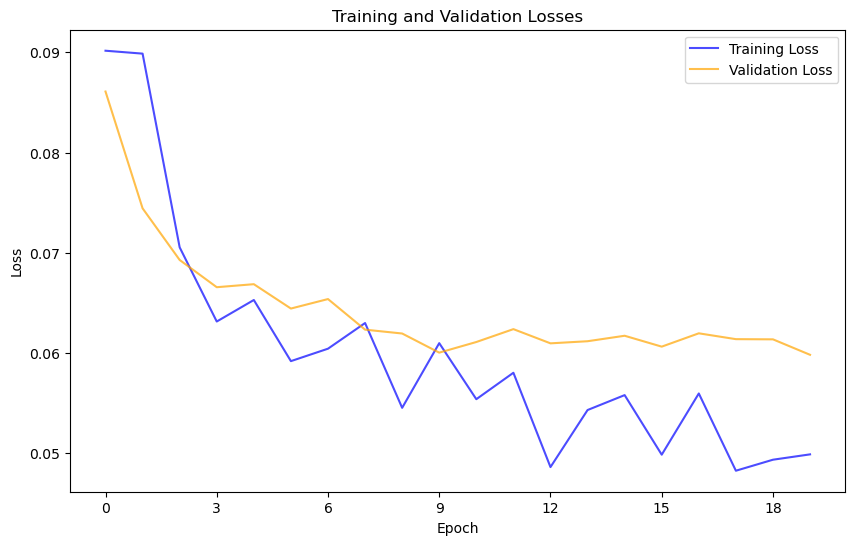

Plotting test images: 100%|██████████| 20/20 [00:01<00:00, 11.98it/s]


In [239]:
if __name__ == "__main__":
    main()